In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# cluster : 하나의 덩어리, 하나의 그룹 단위
from sklearn import cluster
from sklearn import datasets
from sklearn import metrics

# 랜덤 6*2 배열 데이터로 테스트
X = np.array([[23, 42], [188, 543], [12, 10],
              [81, 93], [32, 20], [40, 112],
              [2, 14], [5, 56], [23, 4]])

kmeans = cluster.KMeans(n_clusters=2, random_state=0).fit(X) 
print("Clusters : ", kmeans.labels_)
# 중심값 확인.
print("Cluster centroids: ", kmeans.cluster_centers_)
# 모델 테스트
print("Prediction cluster of [0, 0], [8, 4]: ", (kmeans.predict([[0, 0], [8, 4]]))) 

Clusters :  [1 0 1 1 1 1 1 1 1]
Cluster centroids:  [[188.    543.   ]
 [ 27.25   43.875]]
Prediction cluster of [0, 0], [8, 4]:  [1 1]


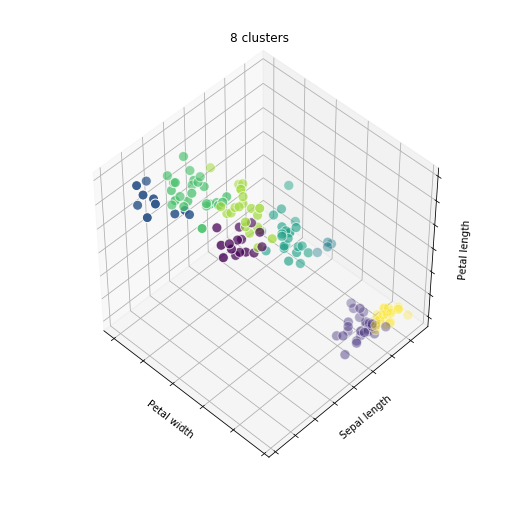

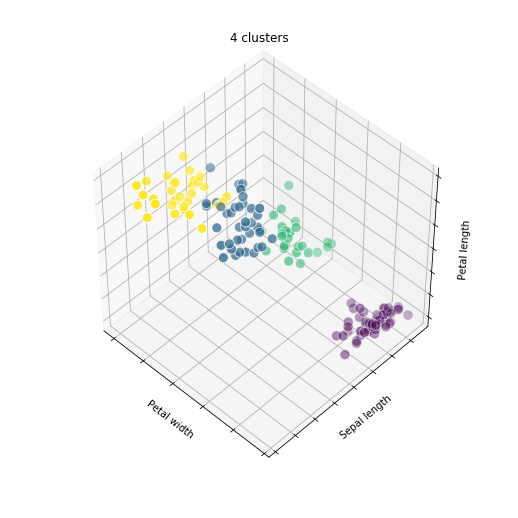

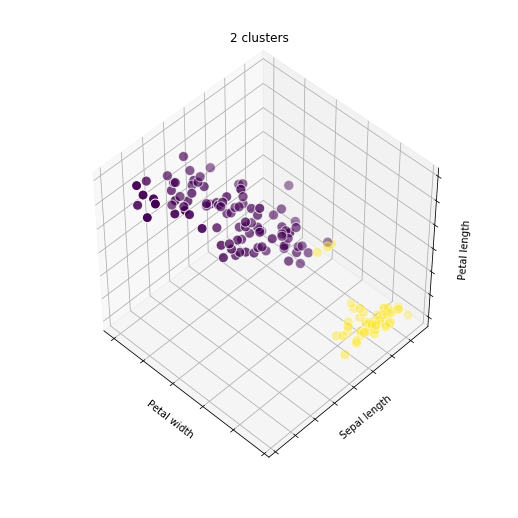

In [2]:
# iris 데이터셋 예측해보기
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 클러스터를 각각 8개, 3개, 랜덤
estimators = [('k=8', cluster.KMeans(n_clusters=8)),
              ('k=4', cluster.KMeans(n_clusters=4)),
              ('k=2', cluster.KMeans(n_clusters=2))] 
fignum = 1
titles = ['8 clusters', '4 clusters', '2 clusters']

# k = 8 / 4 / 2
for name, est in estimators: 
    
    fig = plt.figure(fignum, figsize=(7, 7))
    
    # Set the elevation and azimuth of the axes. 축의 고도와 방위각
    # iris 의 데이터는 3개의 feature를 가지므로 3차원형식으로 표현
    ax = Axes3D(fig, elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    # X = iris.data
    # 예측한 라벨 : labels
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c = labels.astype(np.float), edgecolor='w', s=100)

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐
    fignum = fignum + 1

plt.show()